In [1]:
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_compas

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from aif360.datasets import CompasDataset

# Load the dataset
dataset = CompasDataset()

# Convert to pandas DataFrame
df, _ = dataset.convert_to_dataframe()

In [6]:
df_3 = pd.read_csv("./data/compas-scores-two-years.csv")

In [7]:
df_3.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [8]:
# Indices of data samples to keep
ix = df_3['days_b_screening_arrest'] <= 30
ix = (df_3['days_b_screening_arrest'] >= -30) & ix
ix = (df_3['is_recid'] != -1) & ix
ix = (df_3['c_charge_degree'] != "O") & ix
ix = (df_3['score_text'] != 'N/A') & ix
df_3 = df_3.loc[ix,:]

In [9]:
features_to_keep=['sex', 'age', 'age_cat', 'race',
                     'juv_fel_count', 'juv_misd_count', 'juv_other_count',
                     'priors_count', 'c_charge_degree', 'c_charge_desc',
                     'two_year_recid']

In [10]:
df_3 = df_3[features_to_keep]

In [11]:
df_3.shape

(6172, 11)

In [12]:
dataset_2 = load_preproc_data_compas()

C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\aif360\algorithms\preprocessing\optim_preproc_helpers\data_preproc_functions.py:163: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfcutQ['sex'] = dfcutQ['sex'].replace({'Female': 1.0, 'Male': 0.0})


In [13]:
# Convert to pandas DataFrame
df_2, _ = dataset_2.convert_to_dataframe()

In [14]:
# Display the first few rows of the dataset
print(df_2.head())

    sex  race  age_cat=25 to 45  age_cat=Greater than 45  \
3   0.0   0.0               1.0                      0.0   
4   0.0   0.0               0.0                      0.0   
8   0.0   1.0               1.0                      0.0   
10  1.0   1.0               1.0                      0.0   
14  0.0   1.0               1.0                      0.0   

    age_cat=Less than 25  priors_count=0  priors_count=1 to 3  \
3                    0.0             1.0                  0.0   
4                    1.0             0.0                  0.0   
8                    0.0             0.0                  0.0   
10                   0.0             1.0                  0.0   
14                   0.0             1.0                  0.0   

    priors_count=More than 3  c_charge_degree=F  c_charge_degree=M  \
3                        0.0                1.0                0.0   
4                        1.0                1.0                0.0   
8                        1.0          

In [15]:
df_2.shape

(5278, 11)

In [16]:
df_2.columns

Index(['sex', 'race', 'age_cat=25 to 45', 'age_cat=Greater than 45',
       'age_cat=Less than 25', 'priors_count=0', 'priors_count=1 to 3',
       'priors_count=More than 3', 'c_charge_degree=F', 'c_charge_degree=M',
       'two_year_recid'],
      dtype='object')

In [17]:
# Apply the filters
for col in df_2.columns:
    df_2 = df_2[~df_2[col].isin(["", " "])]

In [18]:
# Apply the filters
for col in df_3.columns:
    df_3 = df_3[~df_3[col].isin(["", " "])]

In [19]:
df_2.shape

(5278, 11)

In [20]:
df_3.shape

(6172, 11)

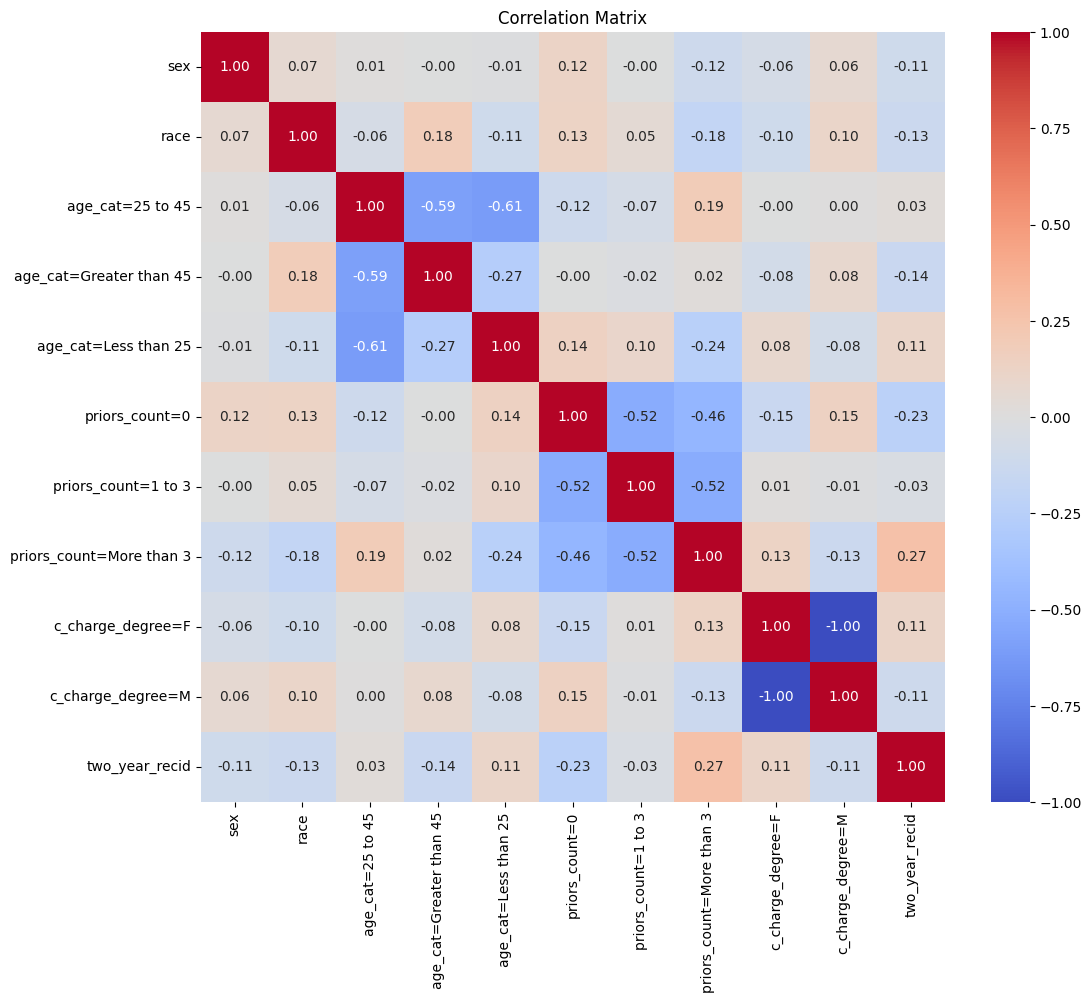

In [21]:
# Correlation matrix
corr = df_2.corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
df_3['race'].value_counts()

race
African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: count, dtype: int64

In [102]:
catvar = [key for key in dict(df_3.dtypes)
             if dict(df_3.dtypes)[key] in ['object'] ] # Categorical Variable

catvar

['sex', 'age_cat', 'race', 'c_charge_degree', 'c_charge_desc']

In [103]:
df_3['sex'] = df_3['sex'].map({'Male': 0, 'Female': 1})

In [104]:
for cat in catvar:
    df_3[cat] = LabelEncoder().fit_transform(df_3[cat])

In [105]:
df_3.head()

,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,two_year_recid
0,0,69,1,5,0,0,0,0,0,15,0
1,0,34,0,0,0,0,0,0,0,150,1
2,0,24,2,0,0,0,1,4,0,282,1
5,0,44,0,5,0,0,0,0,1,38,0
6,0,41,0,2,0,0,0,14,0,261,1


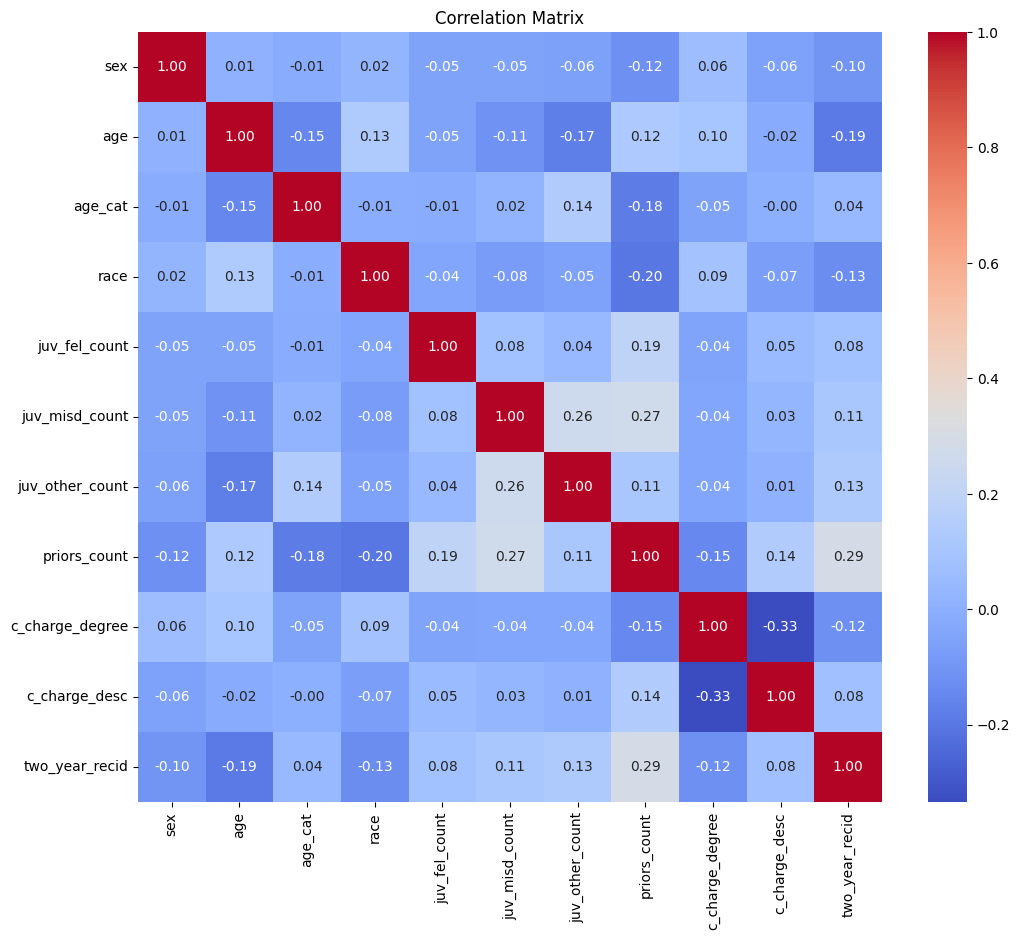

In [106]:
# Correlation matrix
corr = df_3.corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [107]:
df_3.to_csv("compas_preprocessed.csv")